<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/TGII_AMFC_PARTE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TGII AMFC

Estudo de caso de utilização de derivadas em série temporal com a finalidade de prever e analisar a flutuação no mercado financeiro de renda variável analisando ativos comercializados na Bolsa de Valores de São Paulo (B3)

https://www.loom.com/share/5f4315ab12c1453c973e704d6bb4a0b0?sid=7c5fe8a7-894d-436b-8e31-d1c3f6dd241c (link loom)

Versão 05/2024





##3 Parte:  Ciclicidade

### Verificação da massa

In [ ]:
print(dados_all.head(3))
dados = dados_all.copy()
dados.head(3)

            20_day_median  activity  mobility  complexity       Open  \
Date                                                                   
2010-02-02      17.029801  0.661687  0.362458    1.597687  16.979713   
2010-02-03      16.977437  0.615614  0.398711    1.538579  17.007034   
2010-02-04      16.941010  0.545739  0.448243    1.571876  16.711061   

                 High        Low      Close  Adj Close    Volume  
Date                                                              
2010-02-02  17.152744  16.765703  16.984266   9.428848  10004341  
2010-02-03  17.111763  16.715614  16.911413   9.388404   7783594  
2010-02-04  16.802132  16.069029  16.260273   9.026927  11598966  


,20_day_median,activity,mobility,complexity,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2010-02-02,17.029801,0.661687,0.362458,1.597687,16.979713,17.152744,16.765703,16.984266,9.428848,10004341
2010-02-03,16.977437,0.615614,0.398711,1.538579,17.007034,17.111763,16.715614,16.911413,9.388404,7783594
2010-02-04,16.941010,0.545739,0.448243,1.571876,16.711061,16.802132,16.069029,16.260273,9.026927,11598966


### Padrão individualizado Hjorth

In [ ]:
def generate_dynamic_thresholds(dados):
    rolling_std_activity = dados['activity'].rolling(window=20).std()
    rolling_std_mobility = dados['mobility'].rolling(window=20).std()
    rolling_std_complexity = dados['complexity'].rolling(window=20).std()

    buy_threshold_activity = rolling_std_activity * 1.5
    sell_threshold_activity = -rolling_std_activity * 1.5
    buy_threshold_mobility = rolling_std_mobility * 1.5
    sell_threshold_mobility = -rolling_std_mobility * 1.5
    buy_threshold_complexity = rolling_std_complexity * 1.5
    sell_threshold_complexity = -rolling_std_complexity * 1.5

    return (buy_threshold_activity, sell_threshold_activity,
            buy_threshold_mobility, sell_threshold_mobility,
            buy_threshold_complexity, sell_threshold_complexity)

buy_threshold_activity, sell_threshold_activity, buy_threshold_mobility, sell_threshold_mobility, buy_threshold_complexity, sell_threshold_complexity = generate_dynamic_thresholds(dados)

def generate_signals_metric(metric, buy_threshold, sell_threshold):
    signals = np.zeros(len(metric))

    signals[metric > buy_threshold] = 1
    signals[metric < sell_threshold] = -1

    return signals

buy_signals_activity = generate_signals_metric(dados['activity'], buy_threshold_activity, sell_threshold_activity)
sell_signals_activity = generate_signals_metric(dados['activity'], buy_threshold_activity, sell_threshold_activity)

buy_signals_mobility = generate_signals_metric(dados['mobility'], buy_threshold_mobility, sell_threshold_mobility)
sell_signals_mobility = generate_signals_metric(dados['mobility'], buy_threshold_mobility, sell_threshold_mobility)

buy_signals_complexity = generate_signals_metric(dados['complexity'], buy_threshold_complexity, sell_threshold_complexity)
sell_signals_complexity = generate_signals_metric(dados['complexity'], buy_threshold_complexity, sell_threshold_complexity)


In [ ]:
def generate_predictions_metric(buy_signals, sell_signals):
    predictions = np.zeros(len(buy_signals))
    predictions[buy_signals == 1] = 1  # Predição de compra
    predictions[sell_signals == -1] = -1  # Predição de venda
    return predictions

predictions_activity = generate_predictions_metric(buy_signals_activity, sell_signals_activity)
predictions_mobility = generate_predictions_metric(buy_signals_mobility, sell_signals_mobility)
predictions_complexity = generate_predictions_metric(buy_signals_complexity, sell_signals_complexity)

def analyze_cycles(predictions):
    cycle_start = None
    patterns = []

    for i in range(len(predictions)):
        if predictions[i] == 1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Up Cycle')
                cycle_start = None
        elif predictions[i] == -1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Down Cycle')
                cycle_start = None
        else:
            if cycle_start is not None and i - cycle_start >= 2:
                patterns.append('Hold Cycle')
                cycle_start = None

    return patterns

patterns_activity = analyze_cycles(predictions_activity)
patterns_mobility = analyze_cycles(predictions_mobility)
patterns_complexity = analyze_cycles(predictions_complexity)

def count_cycle_patterns(patterns, max_pattern_length):
    pattern_counts = {}

    for length in range(1, max_pattern_length + 1):
        for i in range(len(patterns) - length + 1):
            pattern = tuple(patterns[i:i+length])
            if pattern in pattern_counts:
                pattern_counts[pattern] += 1
            else:
                pattern_counts[pattern] = 1

    return pattern_counts

max_pattern_length = 4
pattern_counts_activity = count_cycle_patterns(patterns_activity, max_pattern_length)
pattern_counts_mobility = count_cycle_patterns(patterns_mobility, max_pattern_length)
pattern_counts_complexity = count_cycle_patterns(patterns_complexity, max_pattern_length)

def print_cycle_patterns(pattern_counts):
    print("\nPadrões de Ciclos Encontrados:")
    for pattern, count in pattern_counts.items():
        print(f"{pattern}: {count} ocorrências")

# Análise de ciclos para cada métrica
print("\nAnálise de Padrões de Ciclos para Atividade:")
print_cycle_patterns(pattern_counts_activity)

print("\nAnálise de Padrões de Ciclos para Mobilidade:")
print_cycle_patterns(pattern_counts_mobility)

print("\nAnálise de Padrões de Ciclos para Complexidade:")
print_cycle_patterns(pattern_counts_complexity)




Análise de Padrões de Ciclos para Atividade:

Padrões de Ciclos Encontrados:
('Up Cycle',): 458 ocorrências
('Hold Cycle',): 22 ocorrências
('Up Cycle', 'Up Cycle'): 437 ocorrências
('Up Cycle', 'Hold Cycle'): 20 ocorrências
('Hold Cycle', 'Up Cycle'): 20 ocorrências
('Hold Cycle', 'Hold Cycle'): 2 ocorrências
('Up Cycle', 'Up Cycle', 'Up Cycle'): 416 ocorrências
('Up Cycle', 'Up Cycle', 'Hold Cycle'): 20 ocorrências
('Up Cycle', 'Hold Cycle', 'Up Cycle'): 18 ocorrências
('Hold Cycle', 'Up Cycle', 'Up Cycle'): 20 ocorrências
('Up Cycle', 'Hold Cycle', 'Hold Cycle'): 2 ocorrências
('Hold Cycle', 'Hold Cycle', 'Up Cycle'): 2 ocorrências
('Up Cycle', 'Up Cycle', 'Up Cycle', 'Up Cycle'): 395 ocorrências
('Up Cycle', 'Up Cycle', 'Up Cycle', 'Hold Cycle'): 20 ocorrências
('Up Cycle', 'Up Cycle', 'Hold Cycle', 'Up Cycle'): 18 ocorrências
('Up Cycle', 'Hold Cycle', 'Up Cycle', 'Up Cycle'): 18 ocorrências
('Hold Cycle', 'Up Cycle', 'Up Cycle', 'Up Cycle'): 20 ocorrências
('Up Cycle', 'Up Cycle

### Massa Windon

In [ ]:
dados_normalized.head(1)

,Open,High,Low,Close,Adj Close,Volume,20_day_median,activity,mobility,complexity
Date,,,,,,,,,,
2010-01-04,0.217424,0.229778,0.232165,0.236468,0.13537,0.073713,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from itertools import groupby

# Normalização dos dados
dados_normalized = (dados - dados.mean()) / dados.std()

def generate_dynamic_thresholds(dados, window):
    rolling_std = dados.rolling(window=window).std()
    buy_threshold = rolling_std * 1.5
    sell_threshold = -rolling_std * 1.5
    return buy_threshold, sell_threshold

def generate_signals(series, buy_threshold, sell_threshold):
    signals = np.zeros(len(series))
    signals[series > buy_threshold] = 1
    signals[series < sell_threshold] = -1
    return signals

def generate_predictions(buy_signals, sell_signals):
    predictions = np.zeros(len(buy_signals))
    predictions[buy_signals == 1] = 1  # Predição de compra
    predictions[sell_signals == -1] = -1  # Predição de venda
    return predictions

def analyze_cycles(predictions, dates):
    cycle_start = None
    patterns = []
    pattern_dates = []

    for i in range(len(predictions)):
        if predictions[i] == 1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Up Cycle')
                pattern_dates.append(dates[cycle_start:i+1])
                cycle_start = None
        elif predictions[i] == -1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Down Cycle')
                pattern_dates.append(dates[cycle_start:i+1])
                cycle_start = None
        else:
            if cycle_start is not None and i - cycle_start >= 2:
                patterns.append('Hold Cycle')
                pattern_dates.append(dates[cycle_start:i+1])
                cycle_start = None

    return patterns, pattern_dates

def count_cycle_patterns(patterns, pattern_dates, max_pattern_length):
    pattern_counts = {}
    pattern_date_dict = {}

    for length in range(1, max_pattern_length + 1):
        for i in range(len(patterns) - length + 1):
            pattern = tuple(patterns[i:i+length])
            if pattern in pattern_counts:
                pattern_counts[pattern] += 1
                pattern_date_dict[pattern].append(pattern_dates[i+length-1])
            else:
                pattern_counts[pattern] = 1
                pattern_date_dict[pattern] = [pattern_dates[i+length-1]]

    return pattern_counts, pattern_date_dict

def print_cycle_patterns(pattern_counts, pattern_dates):
    print("\nPadrões de Ciclos Encontrados:")
    for pattern, count in pattern_counts.items():
        print(f"{pattern}: {count} ocorrências")
        print("Datas das ocorrências:")
        for date_range in pattern_dates[pattern]:
            print(f"  {date_range}")

# Função principal para analisar a série temporal com diferentes médias móveis
def analyze_series_with_moving_averages(dados, windows, max_pattern_length=4):
    dates = dados.index
    dados_normalized = (dados - dados.mean()) / dados.std()

    for window in windows:
        print(f"\nAnalisando com média móvel de {window} períodos:")

        buy_threshold, sell_threshold = generate_dynamic_thresholds(dados_normalized['Close'], window)
        buy_signals = generate_signals(dados_normalized['Close'], buy_threshold, sell_threshold)
        sell_signals = generate_signals(dados_normalized['Close'], buy_threshold, sell_threshold)

        predictions = generate_predictions(buy_signals, sell_signals)

        patterns, pattern_dates = analyze_cycles(predictions, dates)

        pattern_counts, pattern_date_dict = count_cycle_patterns(patterns, pattern_dates, max_pattern_length)

        print_cycle_patterns(pattern_counts, pattern_date_dict)


windows = [20, 50, 100]  # Diferentes médias móveis
analyze_series_with_moving_averages(dados, windows)




A saída de streaming foi truncada nas últimas 5000 linhas.
               '2023-06-06', '2023-06-07', '2023-06-09'],
              dtype='datetime64[ns]', name='Date', freq=None)
  DatetimeIndex(['2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-19', '2023-06-20'],
              dtype='datetime64[ns]', name='Date', freq=None)
  DatetimeIndex(['2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29'],
              dtype='datetime64[ns]', name='Date', freq=None)
  DatetimeIndex(['2023-06-30', '2023-07-03', '2023-07-04', '2023-07-05',
               '2023-07-06', '2023-07-07', '2023-07-10'],
              dtype='datetime64[ns]', name='Date', freq=None)
  DatetimeIndex(['2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14',
               '2023-07-17', '2023-07-18', '2023-07-19'],
              dtype='datetime64[ns]', name='Date', freq=None)
  DatetimeIndex(['2023-07-20', '2023-07-21', '202

### *Padrão massa analise de risco

In [ ]:
print(dados.head(1))

            20_day_median  activity  mobility  complexity       Open  \
Date                                                                   
2010-02-02      17.029801  0.661687  0.362458    1.597687  16.979713   

                 High        Low      Close  Adj Close    Volume  
Date                                                              
2010-02-02  17.152744  16.765703  16.984266   9.428848  10004341  


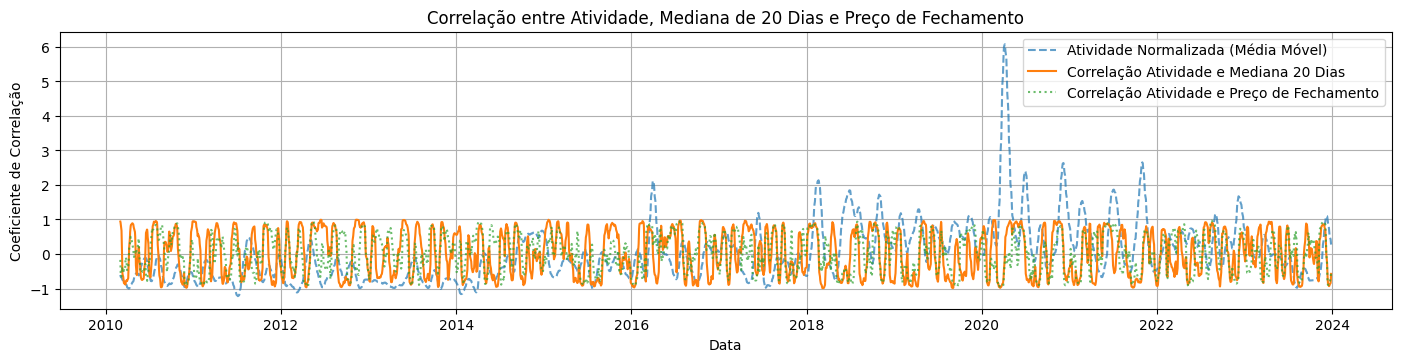


Médias das Correlações:
Correlação Média (Atividade e Mediana 20 Dias): 0.0093
Correlação Média (Atividade e Preço de Fechamento): 0.0162
Correlação Média (Mobilidade e Mediana 20 Dias): -0.0203
Correlação Média (Mobilidade e Preço de Fechamento): -0.0004
Correlação Média (Complexidade e Mediana 20 Dias): -0.0433
Correlação Média (Complexidade e Preço de Fechamento): -0.0347


In [ ]:

def calculate_correlations(dados_normalized):
    """Calcular correlações entre os dados normalizados."""
    correlation_activity_20 = dados_normalized['activity'].rolling(window=20).corr(dados_normalized['20_day_median'])
    correlation_price_activity_20 = dados_normalized['Close'].rolling(window=20).corr(dados_normalized['activity'])

    correlation_mobility_20 = dados_normalized['mobility'].rolling(window=20).corr(dados_normalized['20_day_median'])
    correlation_price_mobility_20 = dados_normalized['Close'].rolling(window=20).corr(dados_normalized['mobility'])

    correlation_complexity_20 = dados_normalized['complexity'].rolling(window=20).corr(dados_normalized['20_day_median'])
    correlation_price_complexity_20 = dados_normalized['Close'].rolling(window=20).corr(dados_normalized['complexity'])

    return (correlation_activity_20, correlation_price_activity_20,
            correlation_mobility_20, correlation_price_mobility_20,
            correlation_complexity_20, correlation_price_complexity_20)

# Step 4: Calculate correlations
(correlation_activity_20, correlation_price_activity_20, correlation_mobility_20, correlation_price_mobility_20, correlation_complexity_20, correlation_price_complexity_20) = calculate_correlations(dados_normalized)

def plot_correlations(correlation_activity_20, correlation_price_activity_20, correlation_mobility_20, correlation_price_mobility_20,correlation_complexity_20, correlation_price_complexity_20, dados_normalized):
    """Plotar correlações entre os descritores."""
    plt.figure(figsize=(14, 10))

    plt.subplot(3, 1, 1)
    plt.plot(dados_normalized['activity'].rolling(window=20).mean(), label='Atividade Normalizada (Média Móvel)', linestyle='--', alpha=0.7)
    plt.plot(correlation_activity_20, label='Correlação Atividade e Mediana 20 Dias')
    plt.plot(correlation_price_activity_20, label='Correlação Atividade e Preço de Fechamento', linestyle=':', alpha=0.7)
    plt.title('Correlação entre Atividade, Mediana de 20 Dias e Preço de Fechamento')
    plt.xlabel('Data')
    plt.ylabel('Coeficiente de Correlação')
    plt.legend()
    plt.grid(True)

    #plt.subplot(3, 1, 2)
    #plt.plot(dados_normalized['mobility'].rolling(window=20).mean(), label='Mobilidade Normalizada (Média Móvel)', linestyle='--', alpha=0.7)
    #plt.plot(correlation_mobility_20, label='Correlação Mobilidade e Mediana 20 Dias')
    #plt.plot(correlation_price_mobility_20, label='Correlação Mobilidade e Preço de Fechamento', linestyle=':', alpha=0.7)
    #plt.title('Correlação entre Mobilidade, Mediana de 20 Dias e Preço de Fechamento')
    #plt.xlabel('Data')
    #plt.ylabel('Coeficiente de Correlação')
    #plt.legend()
    #plt.grid(True)

    #plt.subplot(3, 1, 3)
    #plt.plot(dados_normalized['complexity'].rolling(window=20).mean(), label='Complexidade Normalizada (Média Móvel)', linestyle='--', alpha=0.7)
    #plt.plot(correlation_complexity_20, label='Correlação Complexidade e Mediana 20 Dias')
    #plt.plot(correlation_price_complexity_20, label='Correlação Complexidade e Preço de Fechamento', linestyle=':', alpha=0.7)
    #plt.title('Correlação entre Complexidade, Mediana de 20 Dias e Preço de Fechamento')
    #plt.xlabel('Data')
    #plt.ylabel('Coeficiente de Correlação')
    #plt.legend()
    #plt.grid(True)

    plt.tight_layout()
    plt.show()

# Step 4.1: Plot correlations
plot_correlations(correlation_activity_20, correlation_price_activity_20, correlation_mobility_20, correlation_price_mobility_20, correlation_complexity_20, correlation_price_complexity_20, dados_normalized)

# Calcular médias das correlações
mean_correlation_activity_20 = correlation_activity_20.mean()
mean_correlation_price_activity_20 = correlation_price_activity_20.mean()

mean_correlation_mobility_20 = correlation_mobility_20.mean()
mean_correlation_price_mobility_20 = correlation_price_mobility_20.mean()

mean_correlation_complexity_20 = correlation_complexity_20.mean()
mean_correlation_price_complexity_20 = correlation_price_complexity_20.mean()

# Imprimir médias das correlações
print("\nMédias das Correlações:")
print(f"Correlação Média (Atividade e Mediana 20 Dias): {mean_correlation_activity_20:.4f}")
print(f"Correlação Média (Atividade e Preço de Fechamento): {mean_correlation_price_activity_20:.4f}")

print(f"Correlação Média (Mobilidade e Mediana 20 Dias): {mean_correlation_mobility_20:.4f}")
print(f"Correlação Média (Mobilidade e Preço de Fechamento): {mean_correlation_price_mobility_20:.4f}")

print(f"Correlação Média (Complexidade e Mediana 20 Dias): {mean_correlation_complexity_20:.4f}")
print(f"Correlação Média (Complexidade e Preço de Fechamento): {mean_correlation_price_complexity_20:.4f}")



In [ ]:
dados_normalized.head(1)

,20_day_median,activity,mobility,complexity,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2010-02-02,-0.871587,-0.05812,-1.254113,1.028998,-0.879185,-0.88672,-0.876674,-0.878751,-1.085399,-1.017599


In [ ]:
dados.head(1)

,20_day_median,activity,mobility,complexity,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2010-02-02,17.029801,0.661687,0.362458,1.597687,16.979713,17.152744,16.765703,16.984266,9.428848,10004341


####Sinais

In [ ]:
def generate_dynamic_thresholds(dados_normalized):
    """Gerar limiares dinâmicos com base no desvio padrão móvel."""
    rolling_std = dados_normalized['activity'].rolling(window=20).std()
    buy_threshold = rolling_std * 1.5
    sell_threshold = -rolling_std * 1.5
    return buy_threshold, sell_threshold

# Step 5:  dynamic thresholds
buy_threshold, sell_threshold = generate_dynamic_thresholds(dados_normalized)


def generate_signals(correlation_activity_20, buy_threshold, sell_threshold):
    """Gerar sinais de compra e venda com base nos valores de correlação."""
    buy_signals = np.zeros(len(correlation_activity_20))
    sell_signals = np.zeros(len(correlation_activity_20))

    buy_signals[correlation_activity_20 > buy_threshold] = 1
    sell_signals[correlation_activity_20 < sell_threshold] = -1

    return buy_signals, sell_signals

# Step 6: signalsthresholds
buy_signals, sell_signals = generate_signals(correlation_activity_20, buy_threshold, sell_threshold)


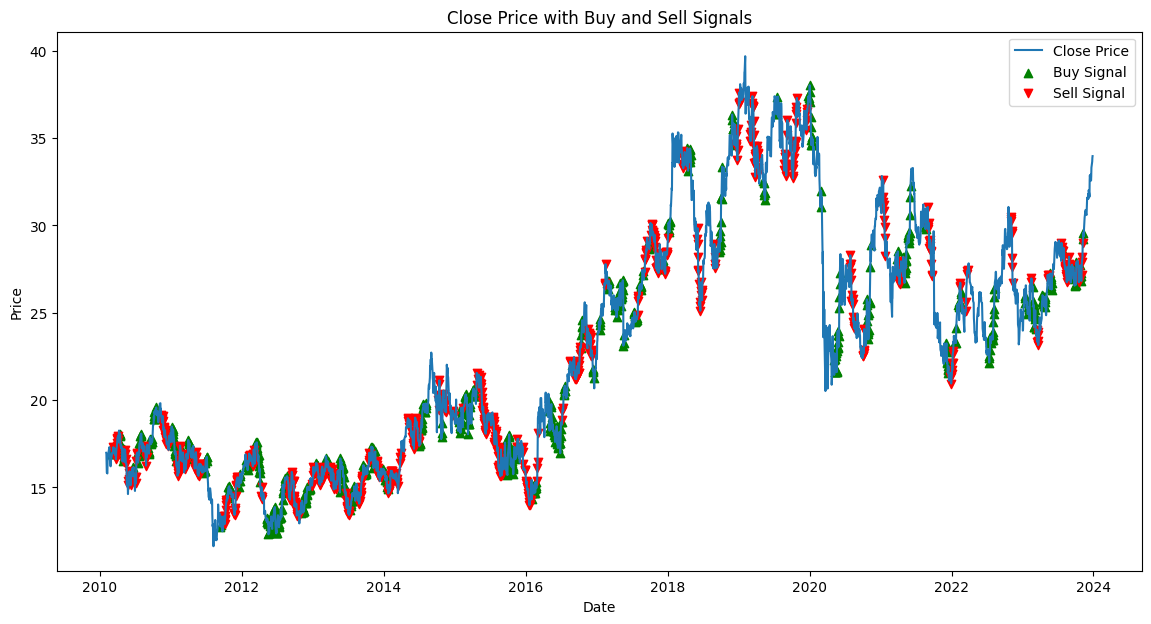

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

def plot_data_and_signals(dados, correlation_activity_20, correlation_price_activity_20, buy_signals, sell_signals, predictions):
    """Plot stock data along with buy and sell signals."""
    fig, axes = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

    # Plot Close Price
    axes[0].plot(dados['Close'], label='Close Price')
    axes[0].set_title('Stock Close Price')
    axes[0].set_ylabel('Price')
    axes[0].legend()
    axes[0].grid(True)

    # Plot Correlations
    axes[1].plot(correlation_activity_20, label='Correlation Activity 20')
    axes[1].plot(correlation_price_activity_20, label='Correlation Price Activity 20')
    axes[1].set_title('Correlations')
    axes[1].set_ylabel('Correlation')
    axes[1].legend()
    axes[1].grid(True)

    # Plot Buy and Sell Signals
    axes[2].plot(dados['Close'], label='Close Price')
    axes[2].scatter(dados.index[buy_signals == 1], dados['Close'][buy_signals == 1], marker='^', color='g', label='Buy Signal')
    axes[2].scatter(dados.index[sell_signals == -1], dados['Close'][sell_signals == -1], marker='v', color='r', label='Sell Signal')
    axes[2].set_title('Buy and Sell Signals')
    axes[2].set_ylabel('Price')
    axes[2].legend()
    axes[2].grid(True)

    # Plot Predictions
    axes[3].plot(dados['Close'], label='Close Price')
    axes[3].plot(dados.index[predictions == 1], dados['Close'][predictions == 1], 'g^', markersize=10, label='Buy Prediction')
    axes[3].plot(dados.index[predictions == -1], dados['Close'][predictions == -1], 'rv', markersize=10, label='Sell Prediction')
    axes[3].set_title('Predictions')
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('Price')
    axes[3].legend()
    axes[3].grid(True)

    plt.tight_layout()
    plt.show()

def plot_signals(dados, buy_signals, sell_signals):
    plt.figure(figsize=(14, 7))
    plt.plot(dados['Close'], label='Close Price')
    #plt.plot(dados['activity'], label='Activity')

    buy_points = dados[buy_signals == 1].index
    sell_points = dados[sell_signals == -1].index

    plt.scatter(buy_points, dados.loc[buy_points, 'Close'], marker='^', color='g', label='Buy Signal')
    plt.scatter(sell_points, dados.loc[sell_points, 'Close'], marker='v', color='r', label='Sell Signal')

    plt.title('Close Price with Buy and Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_signals(dados, buy_signals, sell_signals)

In [ ]:
def calculate_correlations(dados_normalized):
    """Calcular correlações entre os dados normalizados."""
    correlation_activity_20 = dados_normalized['activity'].rolling(window=20).corr(dados_normalized['20_day_median'])
    correlation_price_activity_20 = dados_normalized['Close'].rolling(window=20).corr(dados_normalized['activity'])
    return correlation_activity_20, correlation_price_activity_20

# Step 4: Calculate correlations
correlation_activity_20, correlation_price_activity_20 = calculate_correlations(dados_normalized)

def generate_dynamic_thresholds(dados_normalized):
    """Gerar limiares dinâmicos com base no desvio padrão móvel."""
    rolling_std = dados_normalized['activity'].rolling(window=20).std()
    buy_threshold = rolling_std * 1.5
    sell_threshold = -rolling_std * 1.5
    return buy_threshold, sell_threshold

# Step 5: Generate dynamic thresholds
buy_threshold, sell_threshold = generate_dynamic_thresholds(dados_normalized)

def generate_signals(correlation_activity_20, buy_threshold, sell_threshold):
    """Gerar sinais de compra e venda com base nos valores de correlação."""
    buy_signals = np.zeros(len(correlation_activity_20))
    sell_signals = np.zeros(len(correlation_activity_20))

    buy_signals[correlation_activity_20 > buy_threshold] = 1
    sell_signals[correlation_activity_20 < sell_threshold] = -1

    return buy_signals, sell_signals

# Step 6: Generate signals with dynamic thresholds
buy_signals, sell_signals = generate_signals(correlation_activity_20, buy_threshold, sell_threshold)

def generate_predictions(buy_signals, sell_signals):
    """Gerar predições com base nos sinais de compra e venda."""
    predictions = np.zeros(len(buy_signals))
    predictions[buy_signals == 1] = 1  # Predição de compra
    predictions[sell_signals == -1] = -1  # Predição de venda
    return predictions

# Step 6.1: Generate predictions
predictions = generate_predictions(buy_signals, sell_signals)

def analyze_cycles(predictions):
    """Analisar ciclos de alta, baixa e manutenção."""
    cycle_start = None
    patterns = []

    for i in range(len(predictions)):
        if predictions[i] == 1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Up Cycle')
                cycle_start = None
        elif predictions[i] == -1:
            if cycle_start is None:
                cycle_start = i
            elif i - cycle_start >= 6:
                patterns.append('Down Cycle')
                cycle_start = None
        else:
            if cycle_start is not None and i - cycle_start >= 2:
                patterns.append('Hold Cycle')
                cycle_start = None

    print("\nAnálise de Ciclos:")

    # Calculate dynamic cycle lengths


    up_cycles_lengths = [len(list(g)) for k, g in groupby(patterns) if k == 'Up Cycle']
    down_cycles_lengths = [len(list(g)) for k, g in groupby(patterns) if k == 'Down Cycle']
    hold_cycles_lengths = [len(list(g)) for k, g in groupby(patterns) if k == 'Hold Cycle']

    print(f"Up Cycles: {up_cycles_lengths}")
    print(f"Down Cycles: {down_cycles_lengths}")
    print(f"Hold Cycles: {hold_cycles_lengths}")

    return patterns

def analyze_pattern_between_cycles(patterns, cycle1, cycle2, pattern_length):
    """Analisar padrões entre ciclos específicos."""
    pattern_occurrences = []
    pattern_counts = {}

    for i in range(len(patterns) - pattern_length):
        if np.array_equal(patterns[i:i+pattern_length], [cycle1] * pattern_length) and patterns[i+pattern_length] == cycle2:
            pattern = tuple(patterns[i:i+pattern_length+1])
            pattern_occurrences.append(pattern)

            # Count occurrences of each pattern
            if pattern in pattern_counts:
                pattern_counts[pattern] += 1
            else:
                pattern_counts[pattern] = 1

    print("\nPadrões Entre Ciclos:")
    for pattern, count in pattern_counts.items():
        print(f"{count} ocorrências do padrão {pattern}")

    return pattern_occurrences, pattern_counts

# Step 7: Analyze cycles and patterns
patterns = analyze_cycles(predictions)
patterns_between_cycles, pattern_counts = analyze_pattern_between_cycles(patterns, 'Up Cycle', 'Down Cycle', 3)






Análise de Ciclos:
Up Cycles: [2, 3, 1, 3, 3, 2, 2, 1, 1, 2, 7, 2, 4, 1, 1, 3, 3, 1, 2, 2, 2, 1, 2, 3, 1, 5, 2, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1]
Down Cycles: [2, 1, 1, 3, 1, 1, 3, 1, 2, 2, 5, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1, 4, 5, 2, 3, 2, 1, 2, 1, 2, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1]
Hold Cycles: [1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 5, 1, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 5, 1, 5, 1, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 7, 1, 4, 2, 2, 1, 1, 1, 2]

Padrões Entre Ciclos:
2 ocorrências do padrão ('Up Cycle', 'Up Cycle', 'Up Cycle', 'Down Cycle')


#### *2.2 Implementação da Transformada de Ondícula

In [ ]:
pip install PyWavelets


[*********************100%%**********************]  1 of 1 completed


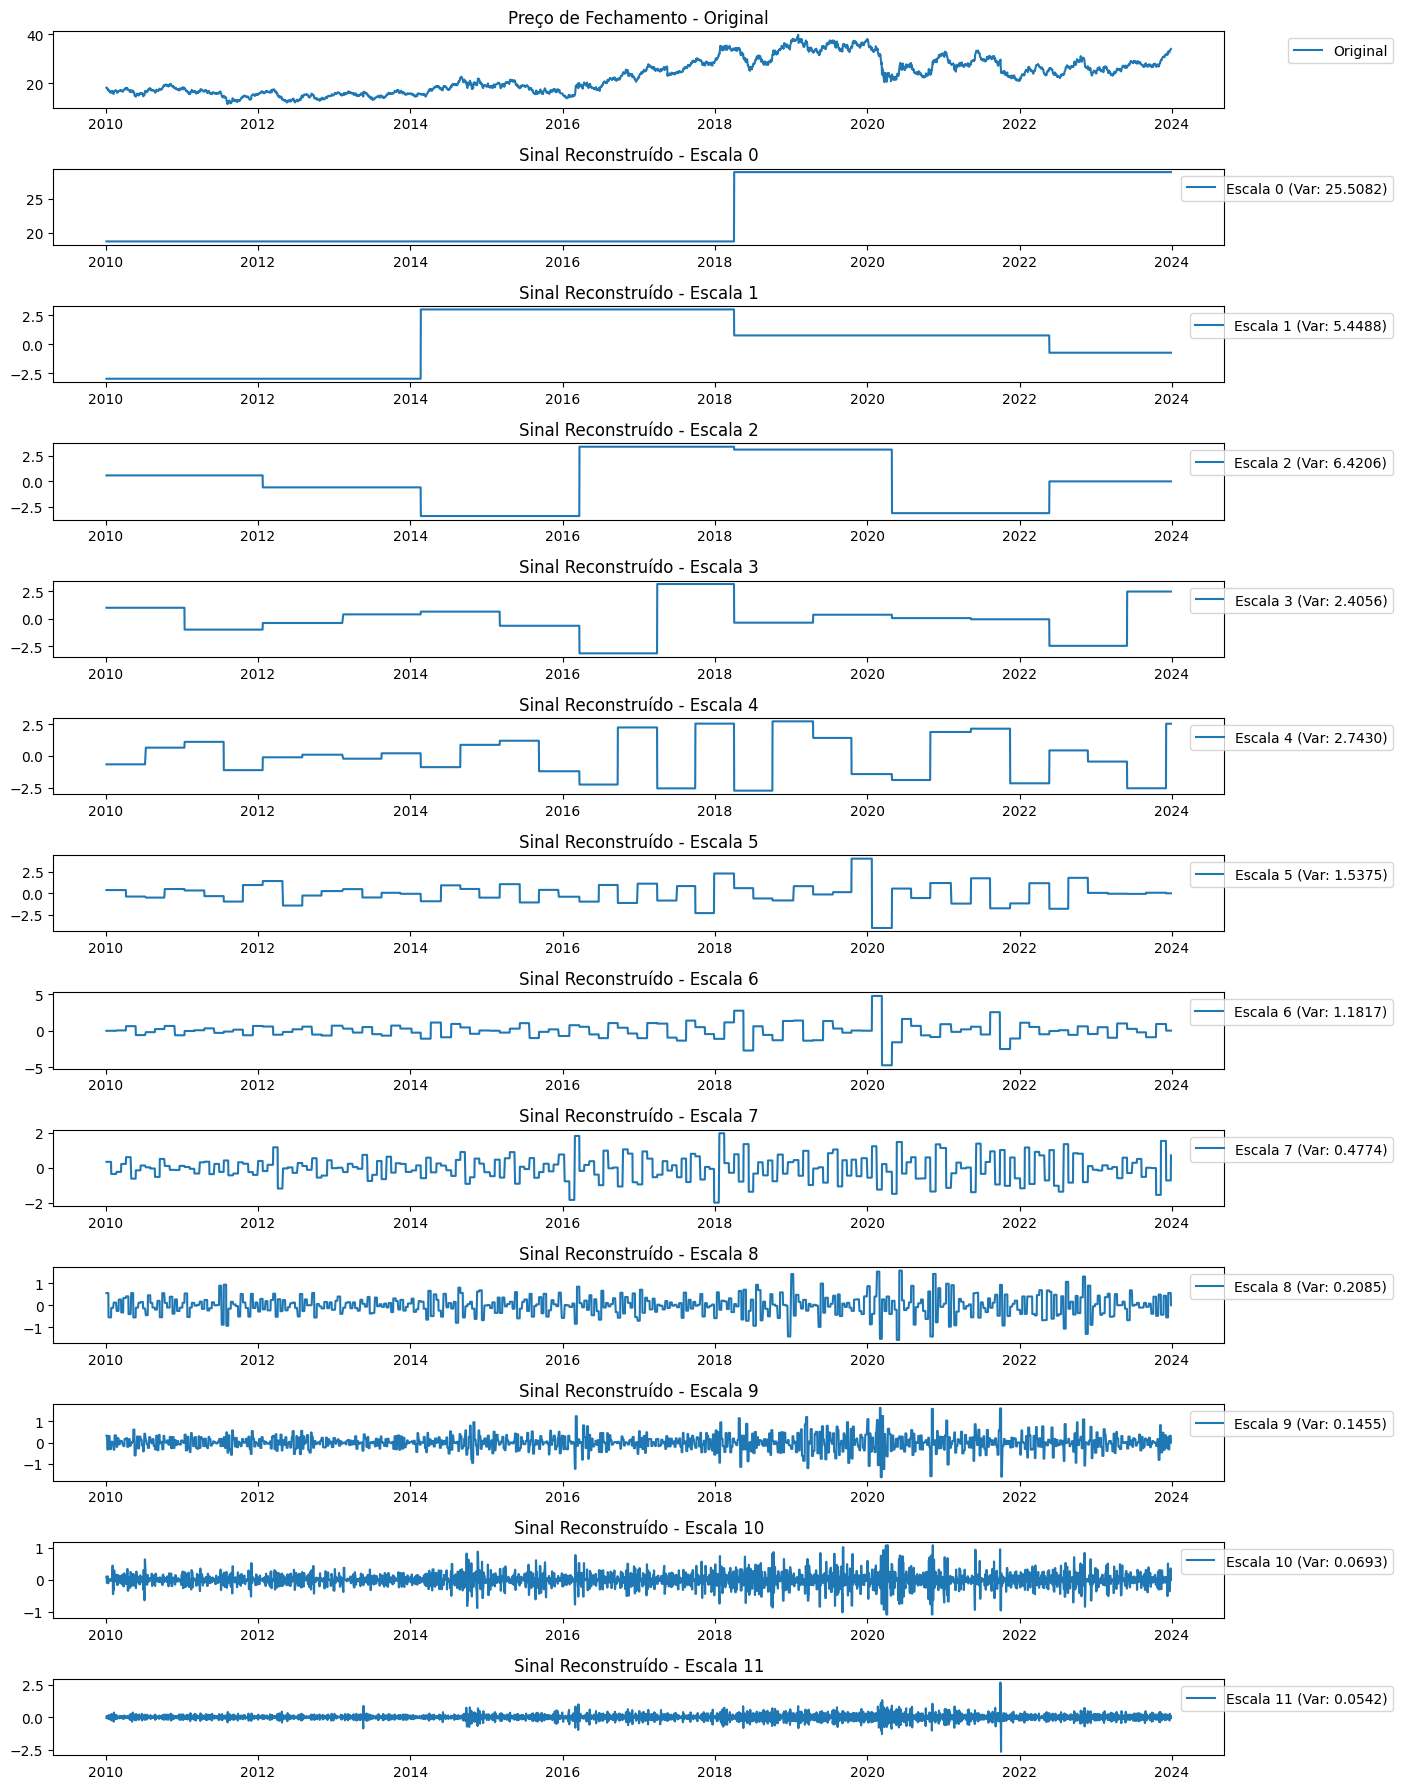


Variância de cada escala:
Escala 0: Variância = 25.5082
Escala 1: Variância = 5.4488
Escala 2: Variância = 6.4206
Escala 3: Variância = 2.4056
Escala 4: Variância = 2.7430
Escala 5: Variância = 1.5375
Escala 6: Variância = 1.1817
Escala 7: Variância = 0.4774
Escala 8: Variância = 0.2085
Escala 9: Variância = 0.1455
Escala 10: Variância = 0.0693
Escala 11: Variância = 0.0542


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import yfinance as yf

# Fase 2: Compreensão dos Dados
def download_stock_data(ticker, start_date, end_date):
    """Baixar dados de ações do Yahoo Finance."""
    dados = yf.download(ticker, start_date, end_date)
    return dados

# Baixar dados
dados = download_stock_data('ITUB4.SA', '2010-01-01', '2024-01-01')

# Extrair a série temporal de preços de fechamento
close_prices = dados['Close'].values

# Aplicar a Transformada de Ondícula Discreta
wavelet = 'db1'  # Escolha da ondícula (Daubechies 1, também conhecida como Haar)
coeffs = pywt.wavedec(close_prices, wavelet)

# Reconstruir os sinais nas diferentes escalas e garantir que todos tenham o mesmo tamanho que close_prices
reconstructed_signals = [pywt.waverec([coeff if i == j else np.zeros_like(coeff)
                                      for j, coeff in enumerate(coeffs)], wavelet)[:len(close_prices)]
                         for i in range(len(coeffs))]

# Calcular a variância de cada escala
variances = [np.var(signal) for signal in reconstructed_signals]

# Plotar os sinais reconstruídos
fig, axes = plt.subplots(len(reconstructed_signals) + 1, 1, figsize=(14, 18))

# Plotar o sinal original
axes[0].plot(dados.index, close_prices, label='Original')
axes[0].set_title('Preço de Fechamento - Original')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Plotar os sinais reconstruídos
for i, (signal, var) in enumerate(zip(reconstructed_signals, variances)):
    axes[i + 1].plot(dados.index, signal, label=f'Escala {i} (Var: {var:.4f})')
    axes[i + 1].set_title(f'Sinal Reconstruído - Escala {i}')
    axes[i + 1].legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

# Imprimir a variância de cada escala
print("\nVariância de cada escala:")
for i, var in enumerate(variances):
    print(f"Escala {i}: Variância = {var:.4f}")
